<a href="https://colab.research.google.com/github/Srushti2101/DevOps-Practical/blob/master/BDL_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BOOK & MOVIE ANALYSIS (BIG DATA ANALYTICS)**



When big data first hit the scene around 2010, it effectively changed the methods used to turn data analytics into useful insight and profit. Big data is often externally sourced, using information drawn from the internet, public data sources, and more to make more accurate predictions. In the entertainment industry, big data can be used to provide a personalized user experience and reduce churn rates among streaming site audiences.

With a seemingly endless array of movies and books for users to choose from, retaining viewers is of paramount importance to streaming services and film production companies. A high churn rate indicates that a company is doing something wrong, and when combined with machine learning, big data can help companies identify problem areas.

## **Dataset 1:**  
IMDb movies is data pulled from popular movie review and reccomendation site IMDb. Each entry in this dataset is a unique movie, and contains information like budget, revenue, votes, and language, etc.



## **Dataset 2:** 
Goodreads-books is data pulled from popular book review and reccomendation site Goodreads. Each entry in this dataset is a unique book, and contains information like author, pages, average rating, and number of reviews. 

## **Goal**
The goal of this project is to do exploratory analyses on these datasets, combine them, and look at entries occurring in both datasets.

Import from Google Drive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Import and Setup Pandas

In [3]:
import pandas as pd

Import IMDb movies dataset .csv file from Google Drive and read values into DataFrame

In [4]:
movies = pd.read_csv("/content/gdrive/My Drive/BDL/IMDb.csv")


Import Goodreads books dataset .csv file from Link and read values into DataFrame

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
bookpath = 'https://raw.githubusercontent.com/noahjett/Movie-Goodreads-Analysis/master/books.csv'

if not os.path.exists("/content/books.csv"):
  books = pd.read_csv(bookpath, error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


Returns rows from Movies DataFrame

In [5]:
movies.head(100)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752
97,150

Return Missing Values

In [6]:
movies.isna().sum()


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

View Statistical Details

In [8]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


Drop Unused Columns

In [9]:
movies = movies.drop(columns=['keywords', 'release_date', 'production_companies', 'homepage'])

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   original_language     4803 non-null   object 
 4   original_title        4803 non-null   object 
 5   overview              4800 non-null   object 
 6   popularity            4803 non-null   float64
 7   production_countries  4803 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  spoken_languages      4803 non-null   object 
 11  status                4803 non-null   object 
 12  tagline               3959 non-null   object 
 13  title                 4803 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

# **Exploratory Analysis**

Authors who have published most Books

In [17]:
most_published_authors = books['authors'].value_counts()[:10]
mostcounts = most_published_authors.reset_index()
mostcounts

,index,authors
0,Agatha Christie,69
1,Stephen King,66
2,Orson Scott Card,48
3,Rumiko Takahashi,46
4,P.G. Wodehouse,42
5,Terry Brooks,40
6,Piers Anthony,34
7,Margaret Weis-Tracy Hickman,33
8,Dan Simmons,32
9,J.R.R. Tolkien,31


Highest Voted Movies

In [19]:
highest_voted = movies.sort_values('vote_count', ascending=False)[:10]
highest_voted_movies = highest_voted[['title', 'tagline', 'original_language', 'vote_count']]
highest_voted_movies

,title,tagline,original_language,vote_count
96,Inception,Your mind is the scene of the crime.,en,13752
65,The Dark Knight,Why So Serious?,en,12002
0,Avatar,Enter the World of Pandora.,en,11800
16,The Avengers,Some assembly required.,en,11776
788,Deadpool,Witness the beginning of a happy ending,en,10995
95,Interstellar,Mankind was born on Earth. It was never meant ...,en,10867
287,Django Unchained,"Life, liberty and the pursuit of vengeance.",en,10099
94,Guardians of the Galaxy,All heroes start somewhere.,en,9742
426,The Hunger Games,May The Odds Be Ever In Your Favor.,en,9455
127,Mad Max: Fury Road,What a Lovely Day.,en,9427


 Highest Voted Movies with at least 10000 votes

In [21]:
highest_with_tt = highest_voted[highest_voted['vote_count'] >= 100][:10]
highest_with_tt = highest_with_tt[['title', 'tagline', 'vote_count', 'genres']]

fave_cols = highest_with_tt[['title', 'vote_count']]

highest_with_tt

,title,tagline,vote_count,genres
96,Inception,Your mind is the scene of the crime.,13752,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam..."
65,The Dark Knight,Why So Serious?,12002,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name..."
0,Avatar,Enter the World of Pandora.,11800,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
16,The Avengers,Some assembly required.,11776,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
788,Deadpool,Witness the beginning of a happy ending,10995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,10867,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""..."
287,Django Unchained,"Life, liberty and the pursuit of vengeance.",10099,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 37, ""name..."
94,Guardians of the Galaxy,All heroes start somewhere.,9742,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na..."
426,The Hunger Games,May The Odds Be Ever In Your Favor.,9455,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
127,Mad Max: Fury Road,What a Lovely Day.,9427,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


Authors who have published most Books

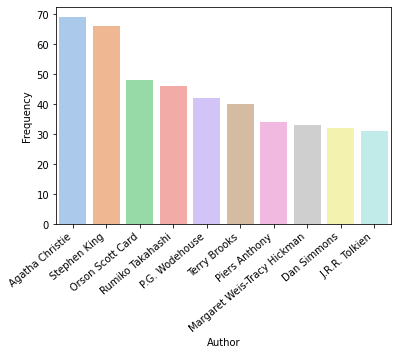

In [24]:
authorplot = sns.barplot(x = 'index',y='authors', data=mostcounts, palette="pastel")
authorplot.set_xticklabels(authorplot.get_xticklabels(), rotation=40, ha="right")
authorplot.set(xlabel='Author', ylabel='Frequency')
plt.show()

Highest Budget Movies

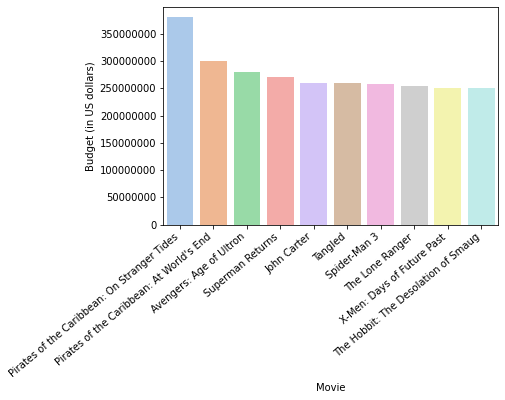

In [25]:
most_expensive_df = movies.sort_values('budget',ascending=False)[:10]

most_expensive = most_expensive_df[['title', 'budget', 'revenue']]

expensiveplot = sns.barplot(x = 'title',y='budget', data=most_expensive, palette="pastel")
expensiveplot.set_xticklabels(expensiveplot.get_xticklabels(), rotation=40, ha="right")
expensiveplot.set(xlabel='Movie', ylabel='Budget (in US dollars)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [26]:
most_expensive

,title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
6,Tangled,260000000,591794936
5,Spider-Man 3,258000000,890871626
13,The Lone Ranger,255000000,89289910
46,X-Men: Days of Future Past,250000000,747862775
22,The Hobbit: The Desolation of Smaug,250000000,958400000


Drop Duplicates

In [29]:
grab_duplicates = movies.sort_values('id', ascending=False).duplicated(['title'], keep = 'first')


In [32]:
movies = movies.drop(movies[grab_duplicates].index)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4800 non-null   int64  
 1   genres                4800 non-null   object 
 2   id                    4800 non-null   int64  
 3   original_language     4800 non-null   object 
 4   original_title        4800 non-null   object 
 5   overview              4797 non-null   object 
 6   popularity            4800 non-null   float64
 7   production_countries  4800 non-null   object 
 8   revenue               4800 non-null   int64  
 9   runtime               4798 non-null   float64
 10  spoken_languages      4800 non-null   object 
 11  status                4800 non-null   object 
 12  tagline               3956 non-null   object 
 13  title                 4800 non-null   object 
 14  vote_average          4800 non-null   float64
 15  vote_count           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


# **Transformation and Merging**

**find_matches()**

This function makes use of the fuzzywuzzy library to do partial string matching, and returns all strings at least xx% the same as the input string

In [33]:
def find_matches(df, column, string_to_match, min_ratio):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    #print('matches', matches)

    # only get matches with a ratio > min_ratio
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    #print('close_matches',close_matches)
    return close_matches


In [35]:
books_slice = books[0:3000].copy()
movie_slice = movies[0:3000].copy()

Generator below enumerates through all titles to find possible matches. This brute force approach takes some time for the full datasets.

In [37]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 3.8MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149810 sha256=baa4b66428b49b30b7a913405dc59b4605ceeb86ebb0bdae5ec646a8c656a922
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


Import FuzzyWuzzy Library

FuzzyWuzzy is a library of Python which is used for string matching.

In [38]:
import fuzzywuzzy
from fuzzywuzzy import process 

The Generator below enumerates through all titles to find possible matches. This brute force approach takes ~ minutes for the full datasets.

In [39]:
matches_dict = {}
# smaller_book_section works
for i in books['title']:
  tmp = find_matches(movies, column='title', string_to_match=str(i),min_ratio=70)
  if tmp != []:
    matches_dict[i] = tmp

same_names = pd.DataFrame.from_dict(matches_dict, orient='index')
same_names = same_names.reset_index()
same_names = same_names[['index',0]]
same_names.columns = ['Book', 'Movie']

#Same names show all of the book/movie title matches at an 80% threshold
#same_names

Performing a second pass over one word titles, requiring a higher level of similarity to accept them as the same.

In [40]:
one_word_titles = same_names[same_names['Book'].str.split().str.len() == 1]
one_word_dict = {}
for i in one_word_titles['Book']:
  tmp = find_matches(one_word_titles, column='Movie', string_to_match=str(i),min_ratio=95)
  if tmp != []:
    one_word_dict[i] = tmp

# one_word_dict shows all one word title book/movie matches at a 90% threshold
one_word_dict
one_word_df = pd.DataFrame.from_dict(one_word_dict, orient='index')
one_word_df = one_word_df.reset_index()
one_word_df


one_word_df.columns = ['Book', 'Movie']
#one_word_df

In [41]:
# grab more than one word titles
same_names_no_ones = same_names[same_names['Book'].str.split().str.len() > 1]

# combine highly likely one-word titles and more than one word titles
same_names_final = pd.concat([same_names_no_ones, one_word_df],sort=True).reset_index(drop=True)


# *********
# Final title matched dataframe
#same_names_final

In [42]:
same_names_final = same_names_final.reset_index()


Now, the same_names_final dataframe contains the partially string matched titles. If we want to do a pandas merge, they still will not merge with the same title. The easiest way to fix this is to simply set one of the titles to the other, so they are consistent

In [43]:
#same_names_final
for i in same_names_final['Book']:
  movie = same_names_final[same_names_final['Book'] == i]['Movie'].iloc[0]

  books.loc[books['title'] == i, 'title'] = movie
  same_names_final.loc[same_names_final['Movie']== movie, 'Book'] = movie


In [44]:
book_to_list = same_names_final['Book'].tolist()
movie_to_list = same_names_final['Movie'].tolist()

get_matched_books = books[books['title'].isin(book_to_list)]
get_matched_movies = movies[movies['title'].isin(movie_to_list)]

In [45]:
# potentially unnecessary sorting step
get_matched_movies.sort_values(by='title')
get_matched_books.sort_values(by='title')
;

''

To Retrieve Merged String-matched Titles

In [46]:
df = pd.merge(get_matched_books,get_matched_movies)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 0 to 1763
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bookID                1764 non-null   int64  
 1   title                 1764 non-null   object 
 2   authors               1764 non-null   object 
 3   average_rating        1764 non-null   float64
 4   isbn                  1764 non-null   object 
 5   isbn13                1764 non-null   int64  
 6   language_code         1764 non-null   object 
 7   # num_pages           1764 non-null   int64  
 8   ratings_count         1764 non-null   int64  
 9   text_reviews_count    1764 non-null   int64  
 10  budget                1764 non-null   int64  
 11  genres                1764 non-null   object 
 12  id                    1764 non-null   int64  
 13  original_language     1764 non-null   object 
 14  original_title        1764 non-null   object 
 15  overview             

In [48]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,budget,genres,id,original_language,original_title,overview,popularity,production_countries,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dark Secrets Revealed,7.4,5293
1,2005,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.56,0747584664,9780747584667,eng,768,1173,72,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dark Secrets Revealed,7.4,5293
2,2,Harry Potter and the Order of the Phoenix,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",675,en,Harry Potter and the Order of the Phoenix,Returning for his fifth year of study at Hogwa...,78.144395,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",938212738,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Evil Must Be Confronted.,7.4,5494
3,3,Harry Potter and the Philosopher's Stone,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390,125000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",671,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,109.984351,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",976475550,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Let the Magic Begin.,7.5,7006
4,34318,Harry Potter and the Philosopher's Stone,J.K. Rowling-Mary GrandPré,4.47,0786222727,9780786222728,eng,424,132,12,125000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",671,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,109.984351,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",976475550,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Let the Magic Begin.,7.5,7006


The 'authors' column includes foreward writers, translators etc. The first entry is always the actual author, so grab that and make an 'author' column.

In [49]:
grab = df['authors'].str.split('-')
grab = grab.apply(lambda x: x[0])
df['author'] = grab

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,1764.0,1.745092e+04,1.331586e+04,1.000000e+00,6.181750e+03,1.395150e+04,2.773450e+04,4.769500e+04
average_rating,1764.0,3.898628e+00,2.869606e-01,0.000000e+00,3.740000e+00,3.920000e+00,4.080000e+00,4.730000e+00
isbn13,1764.0,9.769652e+12,3.285047e+11,2.004913e+10,9.780312e+12,9.780452e+12,9.780768e+12,9.790008e+12
# num_pages,1764.0,3.432642e+02,2.253955e+02,0.000000e+00,2.047500e+02,3.040000e+02,4.320000e+02,1.546000e+03
ratings_count,1764.0,4.968061e+04,2.292599e+05,0.000000e+00,1.977500e+02,1.373000e+03,1.072350e+04,5.629932e+06
text_reviews_count,1764.0,1.325159e+03,5.120308e+03,0.000000e+00,1.800000e+01,1.045000e+02,5.422500e+02,8.423700e+04
budget,1764.0,3.438737e+07,4.074682e+07,0.000000e+00,3.000000e+06,2.000000e+07,5.000000e+07,2.600000e+08
id,1764.0,4.834699e+04,8.420784e+04,1.800000e+01,4.476750e+03,1.138300e+04,4.372050e+04,4.025150e+05
popularity,1764.0,2.423483e+01,2.588397e+01,1.586000e-03,6.908351e+00,1.700210e+01,3.336930e+01,2.719729e+02
revenue,1764.0,9.597562e+07,1.653264e+08,0.000000e+00,1.566892e+05,3.205940e+07,1.171393e+08,1.519558e+09


Return uniques in order of appearance

In [51]:
df['title'].unique()

array(['Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       "Harry Potter and the Philosopher's Stone", ..., 'Point Break',
       'Cinderella Man', 'Blue Valentine'], dtype=object)

We have the books which have movies, we grab those that don't, store in datafraem called just_books

In [53]:
just_books = books[~books['title'].isin(df['title'])]
just_movies = movies[~movies['title'].isin(df['title'])]
books['Made into movie'] = books['title'].isin(df['title'])

In [54]:
just_books = just_books.rename(columns={'average_rating': 'book_rating'})


In [55]:
just_books.describe()
df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1764.000000,1764.000000,1.764000e+03,1764.000000,1.764000e+03,1764.000000,1.764000e+03,1764.000000,1764.000000,1.764000e+03,1764.000000,1764.000000,1764.000000
mean,17450.918934,3.898628,9.769652e+12,343.264172,4.968061e+04,1325.159297,3.438737e+07,48346.990363,24.234830,9.597562e+07,113.089002,6.292971,821.116780
std,13315.863540,0.286961,3.285047e+11,225.395470,2.292599e+05,5120.308236,4.074682e+07,84207.844621,25.883965,1.653264e+08,24.192026,1.060007,1390.131388
min,1.000000,0.000000,2.004913e+10,0.000000,0.000000e+00,0.000000,0.000000e+00,18.000000,0.001586,0.000000e+00,0.000000,0.000000,0.000000
25%,6181.750000,3.740000,9.780312e+12,204.750000,1.977500e+02,18.000000,3.000000e+06,4476.750000,6.908351,1.566892e+05,97.000000,5.800000,89.750000
50%,13951.500000,3.920000,9.780452e+12,304.000000,1.373000e+03,104.500000,2.000000e+07,11383.000000,17.002096,3.205940e+07,109.000000,6.400000,338.000000
75%,27734.500000,4.080000,9.780768e+12,432.000000,1.072350e+04,542.250000,5.000000e+07,43720.500000,33.369305,1.171393e+08,126.000000,7.000000,910.000000
max,47695.000000,4.730000,9.790008e+12,1546.000000,5.629932e+06,84237.000000,2.600000e+08,402515.000000,271.972889,1.519558e+09,276.000000,8.500000,12002.000000


# **Combining**

Books on Goodreads are rated out out of 5.

Movies on IMDb are rated out of 10

In comparing a book+movie combination it would make sense to have a total rating that fairly weighs the two scores. For now I am multiplying the book rating by 2, adding it to the movie score, dividing the total by 2.

Combined Rating of Books and Movies

In [57]:
df['Combined Rating'] = ((df['average_rating'] * 2)  + df['vote_average']) / 2
print('Highest combined rating')
df.sort_values('Combined Rating', ascending=False)[:10][['title','Combined Rating']]

Highest combined rating


,title,Combined Rating
1646,The Shawshank Redemption,8.67
624,Howl's Moving Castle,8.61
1296,The Godfather,8.57
1295,The Godfather,8.57
943,The Green Mile,8.54
19,The Lord of the Rings: The Two Towers,8.53
695,The Lord of the Rings: The Return of the King,8.51
343,The Empire Strikes Back,8.50
16,The Lord of the Rings: The Fellowship of the Ring,8.49
14,The Lord of the Rings: The Fellowship of the Ring,8.49


In [58]:
print('Lowest combined rating')
df.sort_values('Combined Rating', ascending=True)[:10][['title','Combined Rating']]

Lowest combined rating


,title,Combined Rating
241,House at the End of the Drive,3.08
1106,American Pie,3.20
788,The Secret,3.22
1683,The Big Swap,3.52
1740,Butterfly Girl,3.72
299,The Sound and the Shadow,3.80
1077,The Blade of Don Juan,3.82
998,An American in Hollywood,3.91
974,The Algerian,4.01
1091,Queen of the Mountains,4.05


# **Graph Plotting**

**Histogram**

A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

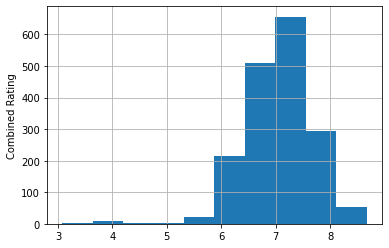

In [59]:
df['Combined Rating'].hist()
plt.ylabel('Combined Rating')
plt.show()

**Distribution Plot**

This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


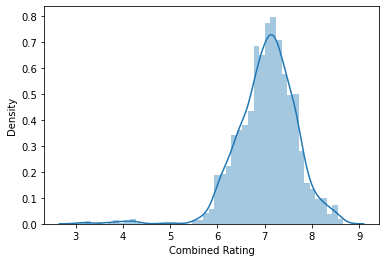

In [60]:
sns.distplot(df['Combined Rating'])

**Probability Plot**

Calculates a best-fit line for the data

In [63]:
from scipy import stats


In [64]:
diff = df['average_rating'] - just_books['book_rating']

((array([-3.86205207, -3.6397285 , -3.51780011, ...,  3.51780011,
          3.6397285 ,  3.86205207]),
  array([-3.71, -1.31, -1.29, ...,   nan,   nan,   nan])),
 (nan, nan, nan))

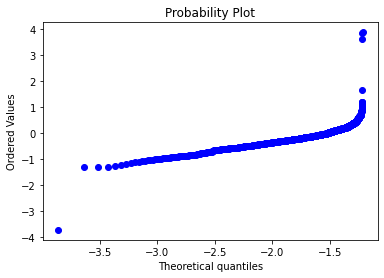

In [65]:
stats.probplot(diff, plot= plt)


# **Linear Regression**

Linear regression to predict movie votes

In [67]:
df.corr()['vote_average'].abs().sort_values(ascending=False)

vote_average          1.000000
Combined Rating       0.893789
runtime               0.418294
popularity            0.408998
vote_count            0.391046
id                    0.284305
revenue               0.251908
average_rating        0.129226
ratings_count         0.079229
text_reviews_count    0.076841
budget                0.068474
bookID                0.019299
isbn13                0.012841
# num_pages           0.006795
Name: vote_average, dtype: float64

In [68]:
from sklearn.linear_model import LinearRegression

In [71]:
# to predict combined rating
features = df[['average_rating', 'ratings_count', '# num_pages', 'text_reviews_count']].values.reshape(-1,4)
outcome = df['vote_average'].values.reshape(-1,1)

Below regression line has the equation:

movie_rating = 1.005 + 1.40book_rating + 4.63e-08ratings_count + 8.52e-05#num_pages + -7,24e-07text_reviews_count.

In [72]:
from sklearn.model_selection import train_test_split 
# 80% of data train, 20% to test
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=0)

movie_rating_regression = LinearRegression().fit(X_train, y_train)

print('intercept', movie_rating_regression.intercept_)
print('coefficient', movie_rating_regression.coef_)

intercept [4.60339491]
coefficient [[ 4.45304381e-01  8.97769324e-08 -1.85438042e-04  1.11748176e-05]]


Compare Predictions to the Actual Value

In [73]:
y_pred = movie_rating_regression.predict(X_test)

regression_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
regression_test

,Actual,Predicted
0,4.8,6.361510
1,7.6,6.306494
2,5.2,6.152361
3,5.4,6.200863
4,6.1,6.302075
...,...,...
348,4.8,6.405996
349,5.4,6.273142
350,5.9,6.244403
351,7.3,6.453090


**Bar Plot**

A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

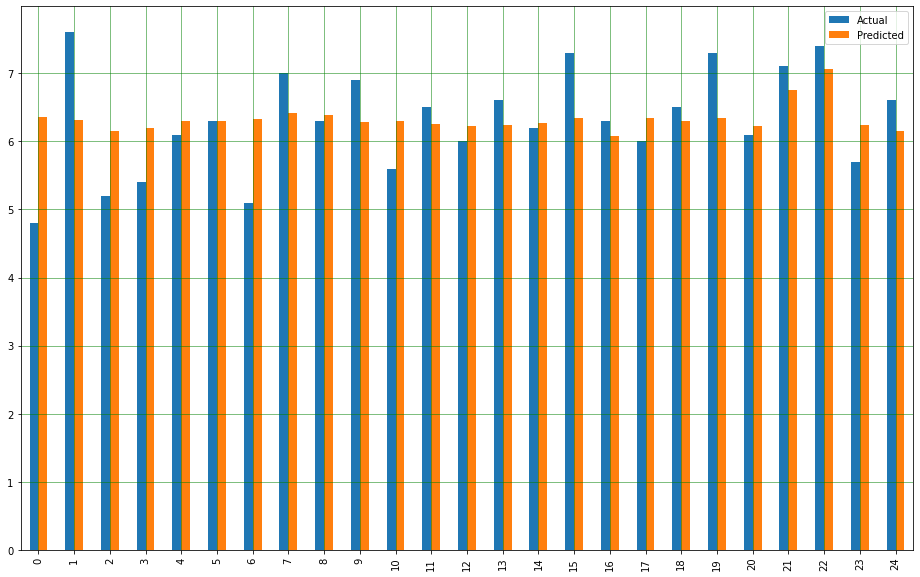

In [74]:
regression_test_plot = regression_test.head(25)
regression_test_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Scatter Plot**

This kind of plot is useful to see complex correlations between two variables.

Regression line plotted against the data

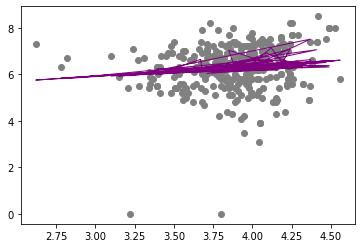

In [79]:
plt.scatter(X_test[:,0], y_test,  color='gray')
plt.plot(X_test[:,0], y_pred, color='purple', linewidth=1)
plt.show()

**Relational Plot**

This provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets

To plot Books that are made into Movies

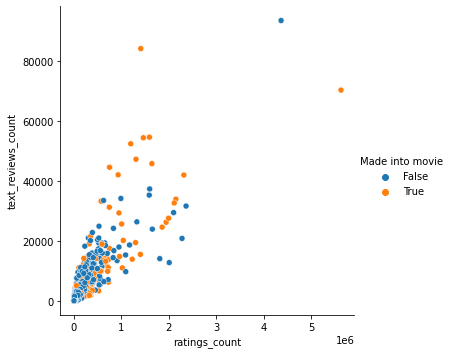

In [80]:
sns.relplot(x='ratings_count', y='text_reviews_count', hue = 'Made into movie', data = books)

# **Conclusion**

This project achieved the following goals:

1.   Merged the Goodreads books and IMDb Movie datasets from Kaggle.
2.   Identified a subset of things which are both books and movies, for use in future analysis.
3.   Found that being made into a movie is not proof of a higher average rating for books or movies.
4.   Used linear regression to predict a movie score from features of a book.
5.   Used logistic regression to predict whether a book was likely to be made into a movie.







